In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


# 1.1 Importing Relevant Libraries

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import warnings
warnings.filterwarnings('ignore')


In [81]:
df= pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')

# 1.2 Data Overview

In [82]:
def styled_heading(text, background_color='#ff6f61', text_color='white'):
    return f"""
    <p style="
        background-color: {background_color};
        font-family: Pacifico, cursive;
        font-size: 150%;
        color: {text_color};
        text-align: center;
        border-radius: 10px;
        padding: 10px;
        font-weight: normal;
        box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
        width: fit-content;
        margin: 0 auto;
    ">
        {text}
    </p>
    """

def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#ff6f61")]},
        {"selector": "td", "props": [("background-color", "#e3f2fd"), ("color", "#333333")]}  # Light blue for table cells
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

def print_dataset_analysis(train_dataset, n_top=5, heading_color='#ff6f61', text_color='white'):
    train_heading = styled_heading(f"📊 Basic Overview of Data", heading_color, text_color)
    display(HTML(train_heading))
    display(HTML(style_table(train_dataset.head(n_top))))

    summary_heading = styled_heading("🔍 Data Summary", heading_color, text_color)
    display(HTML(summary_heading))
    display(HTML(style_table(train_dataset.describe())))

    null_heading = styled_heading("🚫 Null Values in Data", heading_color, text_color)
    train_null_count = train_dataset.isnull().sum()
    display(HTML(null_heading))
    if train_null_count.sum() == 0:
        display(HTML("<p>No null values in the dataset.</p>"))
    else:
        display(HTML("<h3>Null Values:</h3>"))
        display(HTML(style_table(train_null_count[train_null_count > 0].to_frame())))
        display(HTML("<p>These are the null values.</p>"))

    duplicate_heading = styled_heading("♻️ Duplicate Values in Data", heading_color, text_color)
    train_duplicates = train_dataset.duplicated().sum()
    display(HTML(duplicate_heading))
    display(HTML("<h3>Duplicates:</h3>"))
    display(HTML(f"<p>{train_duplicates} duplicate rows found.</p>"))

    shape_heading = styled_heading("📏 Data Shape", heading_color, text_color)
    display(HTML(shape_heading))
    display(HTML("<h3>Shape:</h3>"))
    display(HTML(f"<p>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))

def print_unique_values(train_dataset, heading_color='#ff6f61', text_color='white'):
    unique_values_heading = styled_heading("🔢 Unique Values in Data", heading_color, text_color)
    display(HTML(unique_values_heading))
    unique_values_table = pd.DataFrame({
        'Column Name': train_dataset.columns,
        'Data Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[:7])) for col in train_dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))

In [83]:
print_dataset_analysis(df, n_top=5, heading_color='#14adc6', text_color='white')
print_unique_values(df, heading_color='#12adc6', text_color='white')

gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
2022090800,56,35472,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,False,nan,nan,False,False,False,nan,nan,47917.000000,nan,nan,0.000000,nan,nan,nan,nan
2022090800,56,42392,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,False,nan,nan,False,False,False,nan,nan,47917.000000,nan,nan,0.000000,nan,nan,nan,nan
2022090800,56,42489,BUF,0,0,0,0,0,1,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,False,nan,nan,False,False,True,1.000000,IN,nan,nan,nan,nan,nan,nan,nan,nan
2022090800,56,44875,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,False,nan,nan,False,False,False,nan,nan,43335.000000,nan,nan,0.000000,nan,nan,nan,nan
2022090800,56,44985,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,False,nan,nan,False,False,False,1.000000,OUT,nan,nan,nan,nan,nan,nan,nan,nan


gameId,playId,nflId,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,wasInitialPassRusher,timeToPressureAsPassRusher,getOffTimeAsPassRusher,wasRunningRoute,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,107280.000000,4328.000000,48032.000000,42779.000000,49104.000000,4373.000000,7.000000,53044.000000,4080.000000,43484.000000,2387.000000
2022098903.683585,2023.833091,47437.201033,0.019136,0.087304,0.017571,0.173268,-0.011471,0.015857,0.173373,0.023601,0.082821,0.000761,0.000319,0.000054,0.004138,0.000513,-0.002154,0.003093,0.003986,-0.010357,0.000011,0.024833,0.015437,0.003270,0.012801,0.000544,0.007084,0.000708,0.001266,0.006614,0.391331,2.866382,1.013016,1.000000,46503.634694,49704.308027,49423.428571,0.076917,2.938971,47937.557078,47982.880184
5979.081470,1182.056487,5167.218156,0.137003,1.098183,0.131387,1.840473,0.309496,0.124923,1.841174,0.151803,1.055568,0.027680,0.017845,0.007318,0.064197,0.022645,0.136758,0.055524,0.063010,0.293438,0.003358,0.155617,0.123284,0.057091,0.295682,0.023319,0.508674,0.026697,0.252949,0.291174,0.488050,1.029087,0.298124,0.000000,5105.945879,4056.385738,3275.463471,0.266463,0.989947,4696.183053,4603.065248
2022090800.000000,54.000000,25511.000000,0.000000,-10.000000,0.000000,-10.000000,-18.000000,0.000000,-11.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-15.000000,0.000000,0.000000,0.800000,0.004000,1.000000,33131.000000,35454.000000,46269.000000,0.000000,0.800000,29550.000000,30842.000000
2022092501.000000,996.000000,43426.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.801000,1.000000,43316.000000,46204.000000,47786.500000,0.000000,2.300000,44841.000000,44860.000000
2022100903.000000,2017.000000,46457.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,0.961000,1.000000,46141.000000,48198.000000,47944.000000,0.000000,2.700000,47791.000000,46705.000000
2022102307.000000,3022.000000,52590.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.225000,1.171000,1.000000,52448.000000,53501.000000,50722.500000,0.000000,3.300000,52608.000000,52644.500000
2022110700.000000,5120.000000,55241.000000,1.000000,75.000000,1.000000,98.000000,0.000000,1.000000,98.000000,1.000000,75.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000

0
354351
247447
350399
306695
246879
178549
264489
311948
311948
305623


Column Name,Data Type,Unique Values
gameId,int64,"2022090800, 2022091100, 2022091101, 2022091102, 2022091103, 2022091104, 2022091105"
playId,int64,"56, 80, 101, 122, 167, 191, 212"
nflId,int64,"35472, 42392, 42489, 44875, 44985, 46076, 47857"
teamAbbr,object,"BUF, LA, ATL, NO, CAR, CLE, CHI"
hadRushAttempt,int64,"0, 1"
rushingYards,int64,"0, 7, 1, 5, 2, 3, 4"
hadDropback,int64,"0, 1"
passingYards,int64,"0, 6, 12, 8, 26, 23, 10"
sackYardsAsOffense,int64,"0, -8, -1, -10, -4, -9, -7"
hadPassReception,int64,"0, 1"


In [84]:
# Removing the columns containing 80 percent null values
def null_drop(df, threshold=0.8):
    null_values=df.isnull().mean()
    drop_column=null_values[null_values>threshold].index
    return df.drop(columns=drop_column)

In [85]:
df1 = null_drop(df)
df1.isnull().sum()

gameId                             0
playId                             0
nflId                              0
teamAbbr                           0
hadRushAttempt                     0
rushingYards                       0
hadDropback                        0
passingYards                       0
sackYardsAsOffense                 0
hadPassReception                   0
receivingYards                     0
wasTargettedReceiver               0
yardageGainedAfterTheCatch         0
fumbles                            0
fumbleLost                         0
fumbleOutOfBounds                  0
assistedTackle                     0
forcedFumbleAsDefense              0
halfSackYardsAsDefense             0
passDefensed                       0
quarterbackHit                     0
sackYardsAsDefense                 0
safetyAsDefense                    0
soloTackle                         0
tackleAssist                       0
tackleForALoss                     0
tackleForALossYardage              0
h

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354727 entries, 0 to 354726
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gameId                      354727 non-null  int64  
 1   playId                      354727 non-null  int64  
 2   nflId                       354727 non-null  int64  
 3   teamAbbr                    354727 non-null  object 
 4   hadRushAttempt              354727 non-null  int64  
 5   rushingYards                354727 non-null  int64  
 6   hadDropback                 354727 non-null  int64  
 7   passingYards                354727 non-null  int64  
 8   sackYardsAsOffense          354727 non-null  int64  
 9   hadPassReception            354727 non-null  int64  
 10  receivingYards              354727 non-null  int64  
 11  wasTargettedReceiver        354727 non-null  int64  
 12  yardageGainedAfterTheCatch  354727 non-null  int64  
 13  fumbles       

In [87]:
## So we Have 13 columns that have more than 80% null values drop

# 1.3 Analysis of Rushing and Passing Effectives

In [88]:
# Calculating average rushing and passing yards per game
offense_stats = df1.groupby('gameId').agg(
    avg_rushing_yards=('rushingYards' , 'mean'),
    avg_passing_yards=('passingYards' , 'mean')
).reset_index()

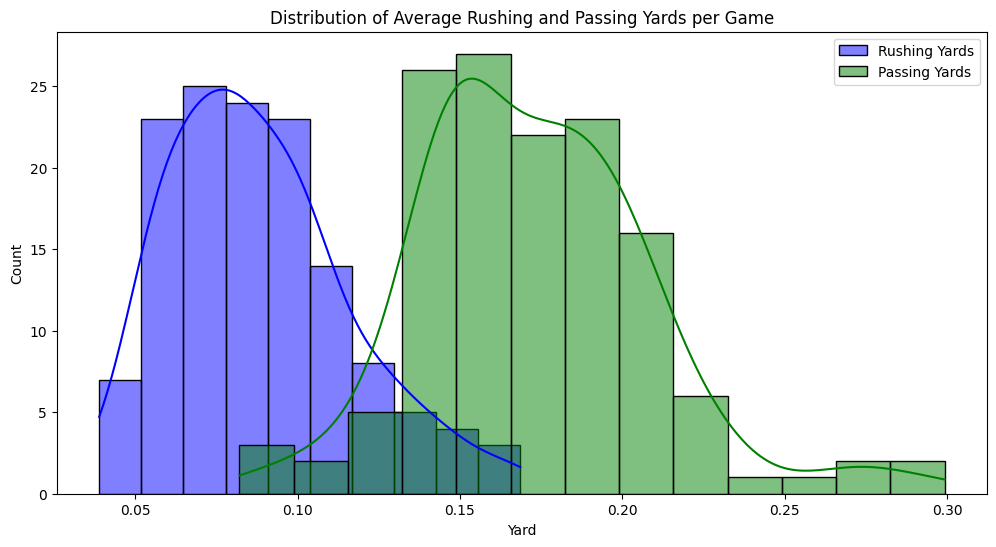

In [89]:
# Visualizing the Rushing and Passing Effectiveness
plt.figure(figsize=(12,6))
sns.histplot(offense_stats['avg_rushing_yards'], color='blue', label='Rushing Yards', kde=True)
sns.histplot(offense_stats['avg_passing_yards'], color='green', label='Passing Yards', kde=True)
plt.title('Distribution of Average Rushing and Passing Yards per Game')
plt.xlabel("Yard")
plt.legend()
plt.show()

**Rushing**: Most games average between 0.05 to 0.10 rushing yards. This means that rushing tends to be relevant for short gains and tends to help control the game.

**Passing**: Lots of the games have an average effective passing range between 0.15 to 0.2. A few go as high as 0.3 yard average. This means that emphasis on passing can speed up field advancement in the progressive half spaces


**Suggestion**: A slightly balanced approach. Priotise on improving passing abalities by developing player passing vision and player positioning awareness. Secondly instill immediate rushing when in short distances. These two can lead to quick transitions

# 1.4 Analysis of Yards After Catch

In [90]:
# Caluculate average yards after catch per game
offense_stats['avg_yards_after_catch'] = df.groupby('gameId')['yardageGainedAfterTheCatch'].mean().values

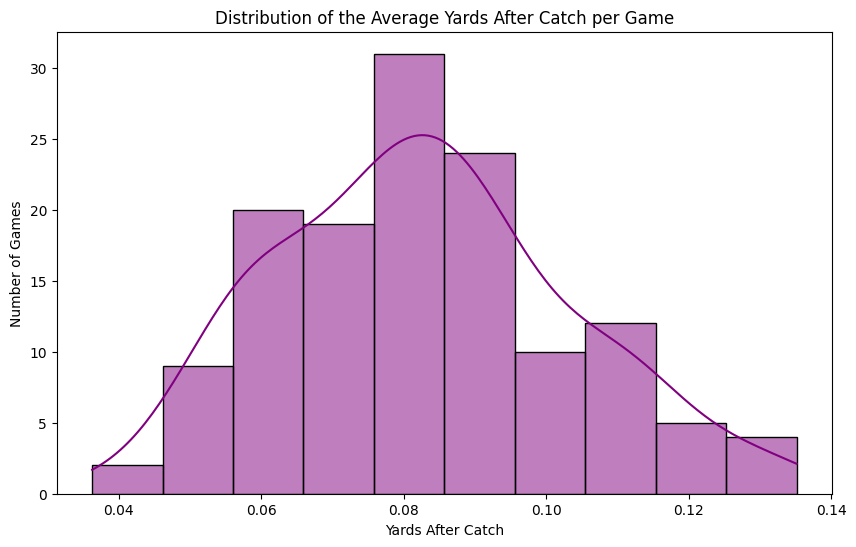

In [91]:
# Visualizing the Distribution of the Yards After Catch

plt.figure(figsize=(10, 6))
sns.histplot(offense_stats['avg_yards_after_catch'], color='purple', kde=True)
plt.title('Distribution of the Average Yards After Catch per Game')
plt.xlabel('Yards After Catch')
plt.ylabel('Number of Games')
plt.show()

Most Games have an average Yard after catch per game clustered around **0.08** yards. The distribution is slighlty symmetrical with a range from **0.04** to **0.12**. 

**Suggestion**: Are players catching the ball in unfavourble positions? Or those with great YACs are not involved in catching enough? Focusing on players with greater YAC can improve the offense. Or better still positioning and passing catch be reassesed.

# 1.5 Analysis of Turnovers and Ball Security

In [92]:
# Calculating Total Fumbles and Fumble losses per game

offense_stats['total_fumbles'] = df1.groupby('gameId')['fumbles'].sum().values
offense_stats['fumbles_lost'] = df1.groupby('gameId')['fumbleLost'].sum().values

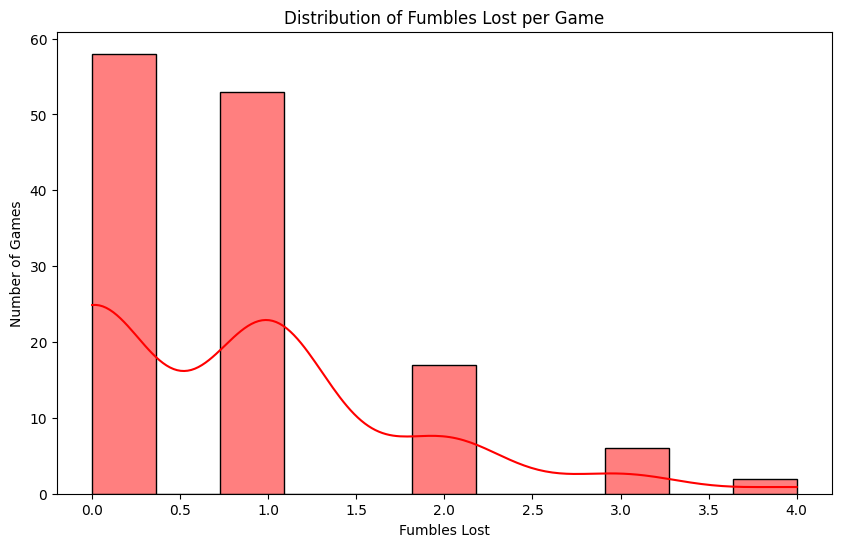

In [93]:
# Visualize fumble losses per game
plt.figure(figsize=(10,6))
sns.histplot(offense_stats['fumbles_lost'], color='red', kde=True)
plt.title("Distribution of Fumbles Lost per Game")
plt.xlabel("Fumbles Lost")
plt.ylabel('Number of Games')
plt.show()

Most games have up to **1** Fumble Loss per game which is pretty normal

# 1.6 Analysis of Quarterback Protection (Sack Yards)

In [94]:
# Calculating average Sack yards lost per game

offense_stats['avg_sack_yards'] = df1.groupby('gameId')['sackYardsAsOffense'].mean().values


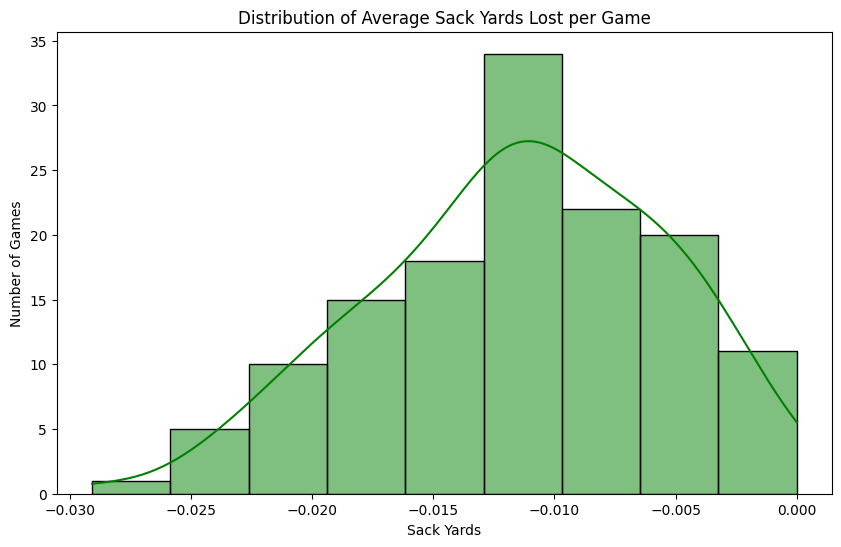

In [95]:
# Visualizing the distribution of sack yards
plt.figure(figsize=(10,6))
sns.histplot(offense_stats['avg_sack_yards'], color='green', kde=True)
plt.title('Distribution of Average Sack Yards Lost per Game')
plt.xlabel('Sack Yards')
plt.ylabel('Number of Games')
plt.show()

Distribution
> Central towards **-0.015** yards. Range is from -0.03 to 0. Shape is roughly normal and slightly skewed to the right

Game Impact
> Low Sack yards tells the story that the offensive protection is great or the quick pass distances and positional runs are good.
> Defensive wise, it means that pass-rushing must me more aggressive.

# 1.7 Analysis of Penalties and Yardage Loss

In [96]:
# Calculating average Sack yards lost per game

offense_stats['avg_penalty_yards'] = df1.groupby('gameId')['penaltyYards'].mean().values


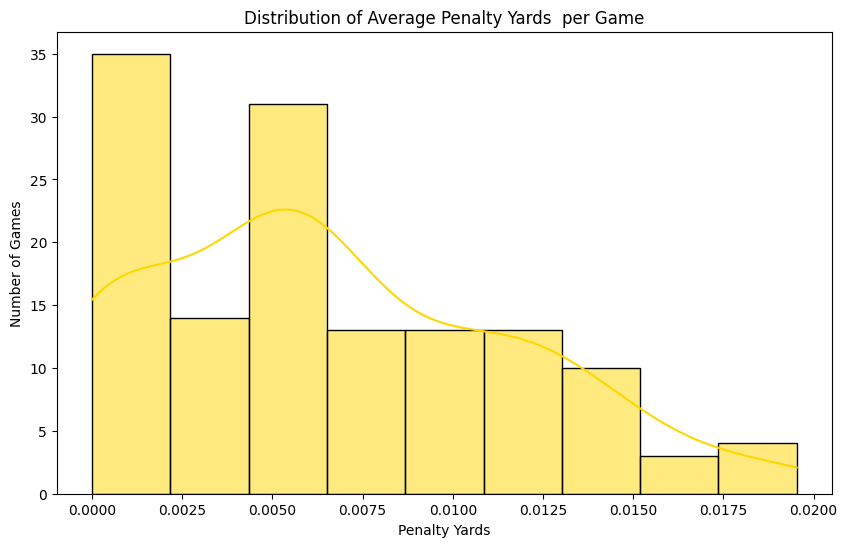

In [97]:
# Visualizing the distribution of penalty yards
plt.figure(figsize=(10,6))
sns.histplot(offense_stats['avg_penalty_yards'], color='gold', kde=True)
plt.title('Distribution of Average Penalty Yards  per Game')
plt.xlabel('Penalty Yards')
plt.ylabel('Number of Games')
plt.show()

Distribution
> Most games average between **0** to **0.005** yards per game with greater number near **zero**
> The distribution is skewed to the right, showing that most games have low penalty yards per game.
> Range is from **0** to **0.02**

Game Impact
> Teams with lower penalty yards tend to be tactically displined.
> Team is able to maintain a good balance between aggressive and conservative plays

# 1.8 Analysis of Turnovers Caused (Interceptions and Fumbles)

In [98]:
# Calculating average and total Turnovers per game

defense_stats = df1.groupby('gameId').agg(
    avg_forced_fumbles=('forcedFumbleAsDefense', 'mean'),
    total_forced_fumbles=('forcedFumbleAsDefense', 'sum'),
    avg_interceptions=('hadInterception', 'mean'),
    total_interceptions=('hadInterception', 'sum')
).reset_index()

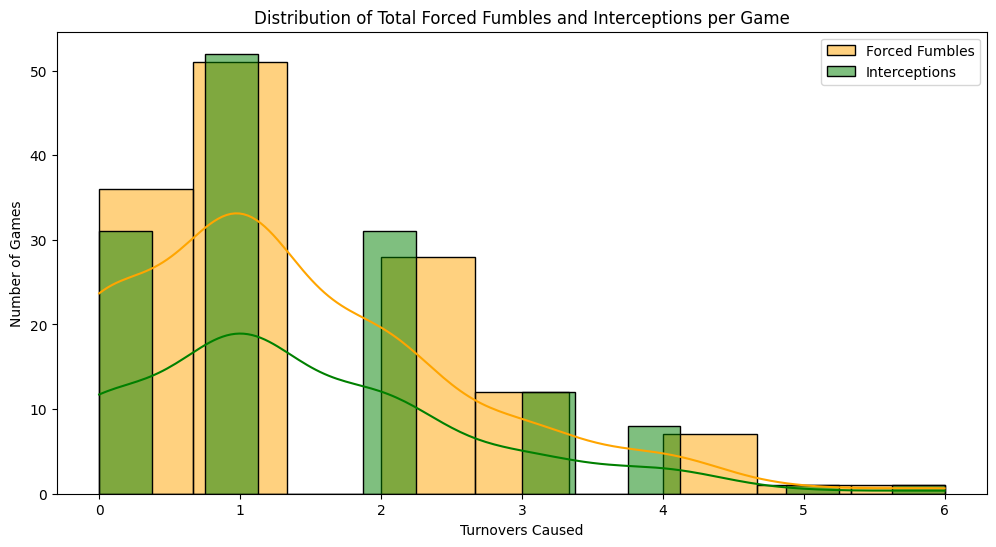

In [99]:
# Visualizing forced fumbles

plt.figure(figsize=(12,6))
sns.histplot(defense_stats['total_forced_fumbles'], color='orange', kde=True, label='Forced Fumbles')
sns.histplot(defense_stats['total_interceptions'], color='green', kde=True, label='Interceptions')
plt.title('Distribution of Total Forced Fumbles and Interceptions per Game')
plt.xlabel('Turnovers Caused')
plt.ylabel('Number of Games')
plt.legend()
plt.show()

Distribution Characteristics
> Distribution is right-skewed. This means that most games do not record high number of turnovers on the average.



# 1.9 Analysis of Pressure on the Quaterback

In [100]:
# Calculating the average quarterback hits and sack yards per game

defense_stats['avg_quarterback_hits']=df1.groupby('gameId')['quarterbackHit'].mean().values
defense_stats['avg_sack_yards_defense']=df1.groupby('gameId')['sackYardsAsDefense'].mean().values
defense_stats['avg_caused_pressure']=df1.groupby('gameId')['causedPressure'].mean().values

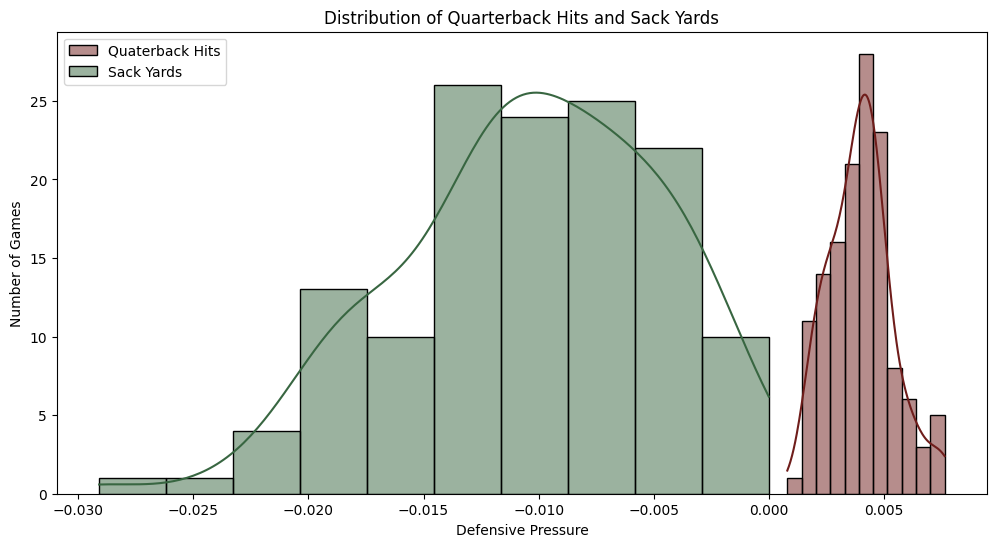

In [101]:
# Visualizing quarterback hits and sack yards
plt.figure(figsize=(12,6))
sns.histplot(defense_stats['avg_quarterback_hits'], color='#6f1d1b', kde=True, label='Quaterback Hits')
sns.histplot(defense_stats['avg_sack_yards_defense'], color ='#386641', kde=True, label='Sack Yards')
plt.title('Distribution of Quarterback Hits and Sack Yards')
plt.xlabel('Defensive Pressure')
plt.ylabel('Number of Games')
plt.legend()
plt.show()

# 1.10 Analysis of Tackles for Loss and Solo Tackles

In [102]:
# Calculating average and total for loss and solo tackles per game

defense_stats['avg_tackles_for_loss'] = df1.groupby('gameId')['tackleForALoss'].mean().values
defense_stats['total_tackles_for_loss'] = df1.groupby('gameId')['tackleForALoss'].sum().values
defense_stats['avg_solo_tackles'] = df1.groupby('gameId')['soloTackle'].mean().values

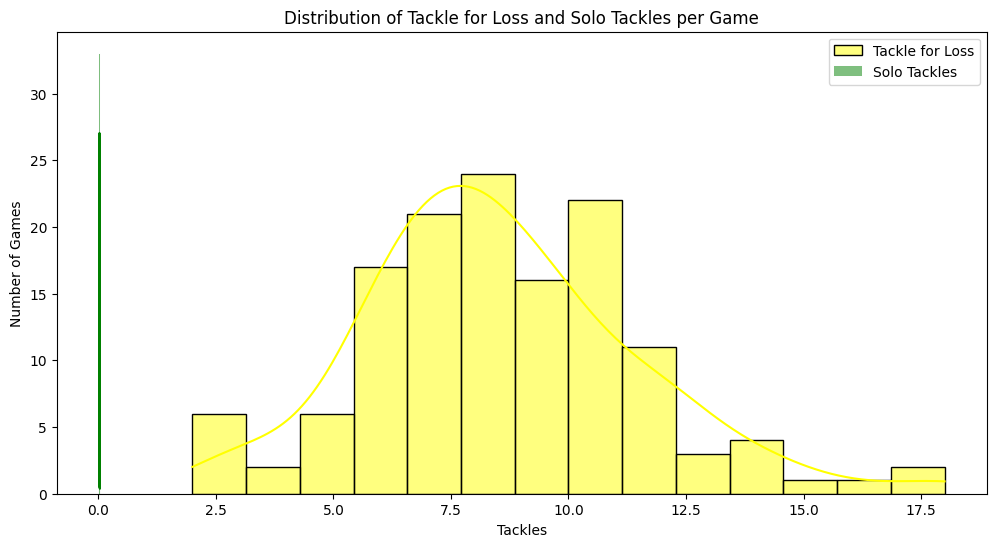

In [103]:
# Visualizing tackles for loss and solo tackles
plt.figure(figsize=(12,6))
sns.histplot(defense_stats['total_tackles_for_loss'], color='yellow', kde=True, label='Tackle for Loss')
sns.histplot(defense_stats['avg_solo_tackles'], color='green', kde=True, label='Solo Tackles')
plt.title('Distribution of Tackle for Loss and Solo Tackles per Game')
plt.xlabel('Tackles')
plt.ylabel('Number of Games')
plt.legend()
plt.show()

Distribution Shape
> Tackles for Loss shows a normal distribution with peak between 7.5 to 10 per game.
> Solo Tackle is just about around zero for almost all games

Implication
> The data suggests that Tackles for Loss are more common in most games.
> Teams will need to investigate why almost zero solo tackles occur in almost all games